In [175]:
import utilities as util
import preprocessor as prep
import pandas as pd
import folium
import plotter as myPlotter
from folium.plugins import MousePosition
import datetime
import seaborn as sns
import matplotlib as plt

<h1> Animal Behaviuor in Relation to the Hurricane Severety

In [176]:
"""
This function calculates the hurricane severity using commonly used formulas in the field.
"""
def calculate_hurricane_severity(hurricane_df):
    hurricane_df['intensity'] = (hurricane_df['max_wind'] / 200.0 + (hurricane_df['min_pressure'] - 900) / 100.0) / 2.0

    severity_categories = {
        "Mild": {"max_wind": 50, "min_pressure": 950, "score": 1},
        "Moderate": {"max_wind": 100, "min_pressure": 925, "score": 2},
        "Strong": {"max_wind": 150, "min_pressure": 900, "score": 3},
        "Extreme": {"max_wind": float("inf"), "min_pressure": 875, "score": 4}
    }

    def calculate_severity(row):
        for category, thresholds in severity_categories.items():
            if row['max_wind'] <= thresholds["max_wind"] and row['min_pressure'] >= thresholds["min_pressure"]:
                return thresholds["score"]
        return 0

    hurricane_df['severity'] = hurricane_df.apply(calculate_severity, axis=1)

    return hurricane_df


In [177]:
full_hurricane_1992 = prep.process_hurricane_txt('C:/Users/Ben/Documents/GitHub/Animal-Motion-for-predictions/data/Hurricanes_Golf/hurricanes_1992.txt')

t = prep.preprocess_4_LR('C:/Users/Ben/Documents/GitHub/Animal-Motion-for-predictions/data/animals/tiger_sharks_full_more_detailed_with_dependantVar.csv')
t = prep.preprocess_all_animals(t)
start = t['date'].min() - datetime.timedelta(days=60)
end = t['date'].max() + datetime.timedelta(days=60)

c:\Users\Ben\Documents\GitHub\Animal-Motion-for-predictions\src\preprocessor.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_column.iloc[i] = lat
c:\Users\Ben\Documents\GitHub\Animal-Motion-for-predictions\src\preprocessor.py:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lon_column.iloc[i] = lon


In [178]:
for i, row in full_hurricane_1992.iterrows():
        full_hurricane_1992.at[i, "max_wind"] = float(row["max_wind"])
        full_hurricane_1992.at[i, "min_pressure"] = float(row["min_pressure"])


In [179]:
full_hurricane_1992 = calculate_hurricane_severity(full_hurricane_1992)



In [180]:
g_p = pd.read_csv('g_p_3000_a.csv')
g_p = prep.preprocess_4_LR('g_p_3000_a.csv')
g_p = prep.preprocess_all_animals(g_p)
hurricane_4_tigerSharks = full_hurricane_1992[(full_hurricane_1992['date']> start) & (full_hurricane_1992['date']< end)]


In [171]:
# import pandas as pd
# import numpy as np

# legend_labels = ['2500-3000 km', '2000-2500 km', '1500-2000 km', '1000-1500 km', '700-1000 km','500-700 km','200-500 km','0-200 km']

# # Define your distance groups (in km)
# dist_groups = {'g1': [2500, 3000], 'g2': [2000, 2500], 'g3': [1500, 2000],'g4': [1000, 1500],'g5': [700, 1000],'g6': [500, 700],'g7': [200, 500],'g8': [0, 200]}

# # Initialize an empty dictionary to store the results
# results = {}

# # For each hurricane, calculate the number of sharks in each distance group
# for hurricane in hurricane_4_tigerSharks['name'].unique():
#     # initialize an empty dictionary for each hurricane in results
#     results[hurricane] = {}

#     hurricane_intensity = hurricane_4_tigerSharks.loc[hurricane_4_tigerSharks['name'] == hurricane, 'intensity'].mean()
#     hurricane_severity = hurricane_4_tigerSharks.loc[hurricane_4_tigerSharks['name'] == hurricane, 'severity'].mean()

#     # Filter animal dataframe for this hurricane
#     animal_hurricane_df = g_p.loc[g_p['event_name'] == hurricane]

#     # For each distance group, calculate the number of sharks
#     for group, (min_dist, max_dist) in dist_groups.items():
#         num_sharks = len(animal_hurricane_df.loc[(animal_hurricane_df['distance_from_event_in_km'] > min_dist) & 
#                                                  (animal_hurricane_df['distance_from_event_in_km'] <= max_dist)])
#         results[hurricane][group] = num_sharks

#     # Store the average intensity and severity for this hurricane
#     results[hurricane]['intensity'] = hurricane_intensity
#     results[hurricane]['severity'] = hurricane_severity

# # Convert the results to a pandas DataFrame
# results_df = pd.DataFrame(results).T


In [172]:
# print(results_df.shape)

# zero_counts = (results_df == 0.0).sum(axis=1)

# filtered_df = results_df[zero_counts <= 7].copy()
# print(filtered_df.shape)
# filtered_df.to_csv('by dist by intensity.csv',index=False)

In [173]:
# max_severities = hurricane_4_tigerSharks.groupby('name')['severity'].max()

# for severity in max_severities.unique():
#     severe_hurricane_names = max_severities[max_severities == severity].index.unique()
#     severe_df = g_p[g_p['event_name'].isin(severe_hurricane_names)]
    
#     if len(severe_df) > 0:
#         plt.figure(figsize=(10,6))
#         sns.histplot(severe_df['distance_from_event_in_km'], bins=30, kde=True)
#         plt.title(f'Histogram of Distances from Event for Max Severity {severity}')
#         plt.xlabel('Distance from Event (km)')
#         plt.ylabel('Frequency')
#         plt.show()


Sample size for severity 1: 263
Sample size for severity 2: 263
Sample size for severity 3: 263


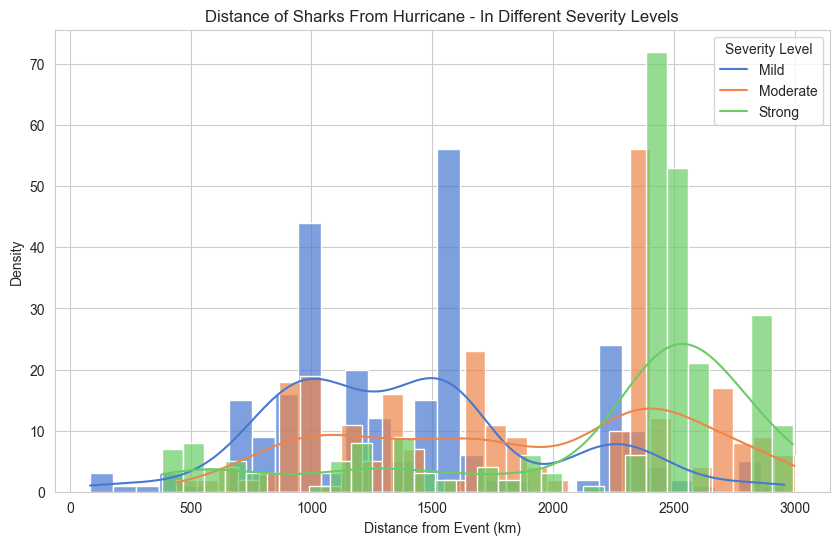

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')
severities_to_consider = [1, 2, 3]

palette = sns.color_palette("muted", len(severities_to_consider))

data = []

min_group_size = min([len(g_p[g_p['event_name'].isin(max_severities[max_severities == severity].index.unique())]) for severity in severities_to_consider])

for severity in severities_to_consider:
    severe_hurricane_names = max_severities[max_severities == severity].index.unique()
    severe_df = g_p[g_p['event_name'].isin(severe_hurricane_names)]
    severe_df_sample = severe_df.sample(min_group_size)
    data.append(severe_df_sample['distance_from_event_in_km'])
    print(f"Sample size for severity {severity}: {len(severe_df_sample)}")

plt.figure(figsize=(10,6))
for d, color in zip(data, palette):
    sns.histplot(d, bins=30, color=color,alpha=0.7, kde=True)

    
plt.title('Distance of Sharks From Hurricane - In Different Severity Levels')
plt.xlabel('Distance from Event (km)')
plt.ylabel('Density')
legend_labels = ['Mild', 'Moderate', 'Strong']
legend = plt.legend(legend_labels)
legend.set_title('Severity Level')
plt.show()


In [182]:
from scipy.stats import kruskal
#Kruskal-Wallis H-test
h_stat, p_val = kruskal(*data)
print(f'H-statistic: {h_stat}, p-value: {p_val}')


H-statistic: 158.97646733082178, p-value: 3.0109167165338425e-35
